<a href="https://colab.research.google.com/github/chetansy/Classification-Using-ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## spliting dependent and independnt features

x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
## feature engineering

geography = pd.get_dummies(x['Geography'],drop_first = True)
gender = pd.get_dummies(x['Gender'],drop_first = True)

In [9]:
## Dropping two columns
x = x.drop(['Gender','Geography'],axis = 1)

In [10]:
## concate two columns dat v hav created
x = pd.concat([x, geography,gender],axis = 1)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
## splitting te dataset into train & test 
# !pip install sklearn
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train,y_test = train_test_split(x, y , test_size = 0.2,random_state=0)

In [14]:
## Scaling feature

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
x_train.shape

(8000, 11)

In [17]:
## Lets create Part 2 for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, PReLU, LeakyReLU,ELU
from tensorflow.keras.layers import Dropout

In [41]:
## lets intialize ANN
classifier = Sequential()

In [42]:
## Adding Input layers
classifier.add(Dense(units = 11 , activation = 'relu'))
classifier.add(Dropout(0.3))

## Adding Hidden layers
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.3))

In [43]:
## Adding second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [44]:
## adding output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.add(Dropout(0.3))

In [45]:
## lets train our NN model
#classifier.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ['accuracy']) ## 'adam' takes learning rate bydefault as 0.1
                                                                                           ## So no need to mention learning rate

In [46]:
## if u want to customize learning rate in Adam 

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
classifier.compile(optimizer=opt, loss = "binary_crossentropy", metrics = ['accuracy']) ## 'adam' takes learning rate bydefault as 0.1


In [47]:
## Early Stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.0001, patience = 20, verbose = 1 , mode = "auto", baseline = None, restore_best_weights=False)

In [48]:

model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 1.3397 - accuracy: 0.7791 - val_loss: 0.4639 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.3105 - accuracy: 0.7962 - val_loss: 0.4628 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.2326 - accuracy: 0.7962 - val_loss: 0.4405 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.2759 - accuracy: 0.7962 - val_loss: 0.4483 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.2116 - accuracy: 0.7962 - val_loss: 0.4402 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.2386 - accuracy: 0.7962 - val_loss: 0.4278 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.2471 - accuracy: 0.7962 - val_loss: 0.4233 - val_accuracy:

In [50]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

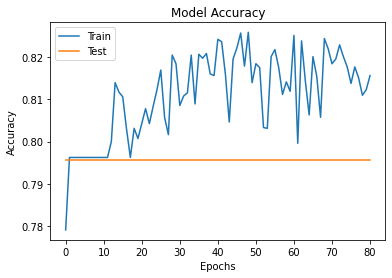

In [51]:
## SUmmerize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()

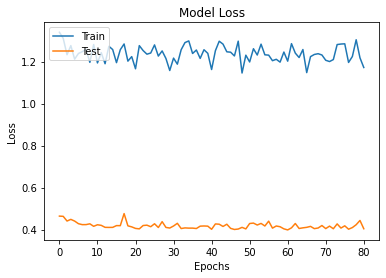

In [52]:
## Summerize history for Loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc= 'upper left')
plt.show()

In [61]:
## Making predictions & evaluating Models
## Predicting test result

y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7975

In [56]:
classifier.get_weights()

[array([[-6.38344660e-02,  1.37384921e-01, -5.59218302e-02,
          1.64679870e-01,  5.31338573e-01, -1.28247097e-01,
         -6.50223136e-01,  8.45817253e-02,  5.44392578e-02,
          5.57581127e-01, -5.41776061e-01],
        [ 2.13212490e+00, -2.04481077e+00,  2.39007688e+00,
          2.11064667e-02, -1.06300402e+00, -2.46284986e+00,
         -2.42107224e+00,  3.97923142e-01,  2.88964838e-01,
         -2.01551676e+00,  1.59054136e+00],
        [ 1.92185611e-01,  7.30033576e-01, -1.96552590e-01,
         -1.03292644e-01, -1.38015121e-01,  1.43623397e-01,
         -6.22606337e-01,  2.71662194e-02,  4.16121073e-02,
          9.64283943e-01,  3.44091982e-01],
        [-7.97633588e-01, -3.02297115e+00,  2.65227407e-01,
         -2.24410594e-01, -1.37679875e+00, -5.07435322e-01,
         -9.93697941e-01, -3.57399297e+00,  2.01279029e-01,
         -2.09349775e+00, -3.10178542e+00],
        [-1.65967911e-01,  4.20031697e-01, -1.01576710e+00,
          3.69305277e+00,  3.93248260e-01,  

In [60]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64